In [1]:
import sqlite3
import csv

# Define database name
db_name = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"

# Create a connection to SQLite
def create_connection():
    conn = sqlite3.connect(db_name)
    return conn

# Define normalized table creation schema
def create_tables(conn):
    cursor = conn.cursor()

    # Create tables
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Age (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            age_range TEXT UNIQUE
        );
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Menopause (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            status TEXT UNIQUE
        );
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS TumorSize (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            size_range TEXT UNIQUE
        );
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS NodeCaps (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            caps TEXT UNIQUE
        );
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Breast (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            side TEXT UNIQUE
        );
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS BreastQuad (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            quadrant TEXT UNIQUE
        );
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Class (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            class_type TEXT UNIQUE
        );
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS CancerData (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            age_id INTEGER,
            menopause_id INTEGER,
            tumor_size_id INTEGER,
            node_caps_id INTEGER,
            breast_id INTEGER,
            breast_quad_id INTEGER,
            class_id INTEGER,
            FOREIGN KEY (age_id) REFERENCES Age (id),
            FOREIGN KEY (menopause_id) REFERENCES Menopause (id),
            FOREIGN KEY (tumor_size_id) REFERENCES TumorSize (id),
            FOREIGN KEY (node_caps_id) REFERENCES NodeCaps (id),
            FOREIGN KEY (breast_id) REFERENCES Breast (id),
            FOREIGN KEY (breast_quad_id) REFERENCES BreastQuad (id),
            FOREIGN KEY (class_id) REFERENCES Class (id)
        );
    """)

    conn.commit()

# Insert data into normalized tables
def insert_data(conn, csv_file):
    cursor = conn.cursor()

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row

        for row in reader:
            age, menopause, tumor_size, node_caps, _, _, breast, breast_quad, _, class_type = [col.strip("'") for col in row]

            # Insert into dimension tables and get their IDs
            cursor.execute("INSERT OR IGNORE INTO Age (age_range) VALUES (?)", (age,))
            cursor.execute("SELECT id FROM Age WHERE age_range = ?", (age,))
            age_id = cursor.fetchone()[0]

            cursor.execute("INSERT OR IGNORE INTO Menopause (status) VALUES (?)", (menopause,))
            cursor.execute("SELECT id FROM Menopause WHERE status = ?", (menopause,))
            menopause_id = cursor.fetchone()[0]

            cursor.execute("INSERT OR IGNORE INTO TumorSize (size_range) VALUES (?)", (tumor_size,))
            cursor.execute("SELECT id FROM TumorSize WHERE size_range = ?", (tumor_size,))
            tumor_size_id = cursor.fetchone()[0]

            cursor.execute("INSERT OR IGNORE INTO NodeCaps (caps) VALUES (?)", (node_caps,))
            cursor.execute("SELECT id FROM NodeCaps WHERE caps = ?", (node_caps,))
            node_caps_id = cursor.fetchone()[0]

            cursor.execute("INSERT OR IGNORE INTO Breast (side) VALUES (?)", (breast,))
            cursor.execute("SELECT id FROM Breast WHERE side = ?", (breast,))
            breast_id = cursor.fetchone()[0]

            cursor.execute("INSERT OR IGNORE INTO BreastQuad (quadrant) VALUES (?)", (breast_quad,))
            cursor.execute("SELECT id FROM BreastQuad WHERE quadrant = ?", (breast_quad,))
            breast_quad_id = cursor.fetchone()[0]

            cursor.execute("INSERT OR IGNORE INTO Class (class_type) VALUES (?)", (class_type,))
            cursor.execute("SELECT id FROM Class WHERE class_type = ?", (class_type,))
            class_id = cursor.fetchone()[0]

            # Insert into CancerData table
            cursor.execute(
                """
                INSERT INTO CancerData (age_id, menopause_id, tumor_size_id, node_caps_id, breast_id, breast_quad_id, class_id)
                VALUES (?, ?, ?, ?, ?, ?, ?)
                """,
                (age_id, menopause_id, tumor_size_id, node_caps_id, breast_id, breast_quad_id, class_id)
            )

    conn.commit()

# Main execution
if __name__ == "__main__":
    connection = create_connection()
    create_tables(connection)
    insert_data(connection, r"C:\Users\preet\OneDrive\Desktop\python project\breast-cancer.csv")
    connection.close()
    print("Database normalization and population complete!")


Database normalization and population complete!


In [2]:
import sqlite3
import pandas as pd

# Database path
db_name = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"

# SQL Query
query = """
SELECT
    CancerData.id AS CancerDataID,
    Age.age_range AS AgeRange,
    Menopause.status AS MenopauseStatus,
    TumorSize.size_range AS TumorSize,
    NodeCaps.caps AS NodeCaps,
    Breast.side AS BreastSide,
    BreastQuad.quadrant AS BreastQuadrant,
    Class.class_type AS ClassType
FROM
    CancerData
JOIN
    Age ON CancerData.age_id = Age.id
JOIN
    Menopause ON CancerData.menopause_id = Menopause.id
JOIN
    TumorSize ON CancerData.tumor_size_id = TumorSize.id
JOIN
    NodeCaps ON CancerData.node_caps_id = NodeCaps.id
JOIN
    Breast ON CancerData.breast_id = Breast.id
JOIN
    BreastQuad ON CancerData.breast_quad_id = BreastQuad.id
JOIN
    Class ON CancerData.class_id = Class.id;
"""

# Load data into Pandas DataFrame
def fetch_data_to_dataframe(db_name, query):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_name)
    
    # Execute the query and load the results into a DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Close the connection
    conn.close()
    
    return df



In [3]:
# Fetch and display the data
df = fetch_data_to_dataframe(db_name, query)
print(df.head())

   CancerDataID AgeRange MenopauseStatus TumorSize NodeCaps BreastSide  \
0             1    50-59            ge40     15-19      0-2      right   
1             2    50-59            ge40     35-39      0-2       left   
2             3    40-49         premeno     35-39      0-2      right   
3             4    40-49         premeno     30-34      3-5       left   
4             5    50-59         premeno     25-29      3-5      right   

  BreastQuadrant             ClassType  
0        central  no-recurrence-events  
1       left_low     recurrence-events  
2       left_low  no-recurrence-events  
3       right_up     recurrence-events  
4        left_up  no-recurrence-events  


In [4]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split

# Database and query setup
db_name = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"

query = """
SELECT
    CancerData.id AS CancerDataID,
    Age.age_range AS AgeRange,
    Menopause.status AS MenopauseStatus,
    TumorSize.size_range AS TumorSize,
    NodeCaps.caps AS NodeCaps,
    Breast.side AS BreastSide,
    BreastQuad.quadrant AS BreastQuadrant,
    Class.class_type AS ClassType
FROM
    CancerData
JOIN
    Age ON CancerData.age_id = Age.id
JOIN
    Menopause ON CancerData.menopause_id = Menopause.id
JOIN
    TumorSize ON CancerData.tumor_size_id = TumorSize.id
JOIN
    NodeCaps ON CancerData.node_caps_id = NodeCaps.id
JOIN
    Breast ON CancerData.breast_id = Breast.id
JOIN
    BreastQuad ON CancerData.breast_quad_id = BreastQuad.id
JOIN
    Class ON CancerData.class_id = Class.id;
"""

# Load data into DataFrame
def fetch_data_to_dataframe(db_name, query):
    conn = sqlite3.connect(db_name)
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Load data
df = fetch_data_to_dataframe(db_name, query)
print("First few rows of the data:")
print(df.head())

# Explore the target variable distribution
print("\nClass distribution:")
print(df['ClassType'].value_counts())

# Perform Train/Test Split
X = df.drop(columns=['ClassType'])  # Features
y = df['ClassType']  # Target variable

# Determine if stratification is needed
if y.value_counts().min() / y.value_counts().sum() < 0.2:  # Imbalance threshold (20%)
    print("\nThe target variable is imbalanced. Stratifying the train/test split.")
    stratify = y
else:
    print("\nThe target variable is balanced. No stratification needed.")
    stratify = None

# Perform the train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify
)

# Print results
print("\nTrain/Test Split Summary:")
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")
print(f"Class distribution in train set:\n{y_train.value_counts()}")
print(f"Class distribution in test set:\n{y_test.value_counts()}")


First few rows of the data:
   CancerDataID AgeRange MenopauseStatus TumorSize NodeCaps BreastSide  \
0             1    50-59            ge40     15-19      0-2      right   
1             2    50-59            ge40     35-39      0-2       left   
2             3    40-49         premeno     35-39      0-2      right   
3             4    40-49         premeno     30-34      3-5       left   
4             5    50-59         premeno     25-29      3-5      right   

  BreastQuadrant             ClassType  
0        central  no-recurrence-events  
1       left_low     recurrence-events  
2       left_low  no-recurrence-events  
3       right_up     recurrence-events  
4        left_up  no-recurrence-events  

Class distribution:
ClassType
no-recurrence-events    1005
recurrence-events        420
Name: count, dtype: int64

The target variable is balanced. No stratification needed.

Train/Test Split Summary:
Train size: 1140
Test size: 285
Class distribution in train set:
ClassType
no-r

Generating data profile report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Generating Correlation Matrix...


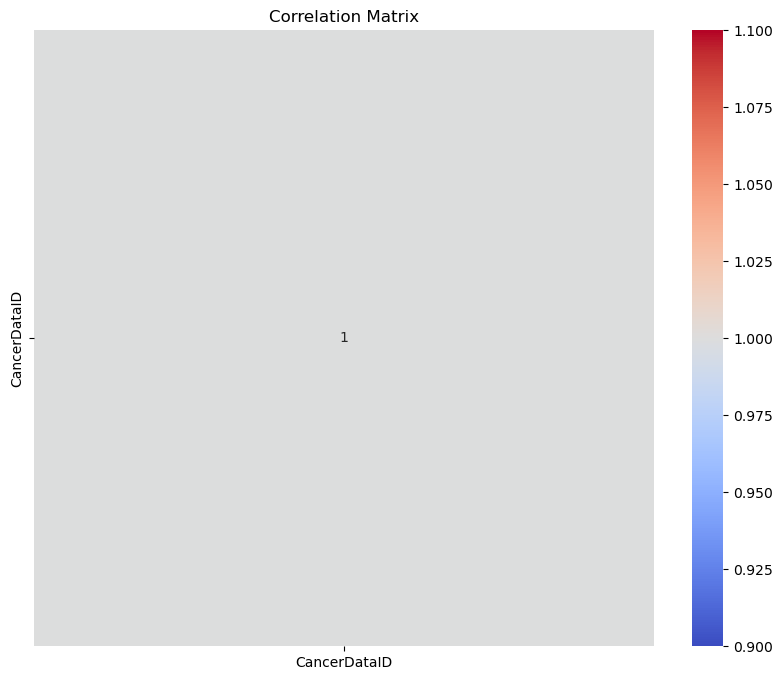


Missing Values Summary:
CancerDataID       0
AgeRange           0
MenopauseStatus    0
TumorSize          0
NodeCaps           0
BreastSide         0
BreastQuadrant     0
ClassType          0
dtype: int64


In [8]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt

# Step 1: Load the data from the SQLite database
db_name = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"

query = """
SELECT
    CancerData.id AS CancerDataID,
    Age.age_range AS AgeRange,
    Menopause.status AS MenopauseStatus,
    TumorSize.size_range AS TumorSize,
    NodeCaps.caps AS NodeCaps,
    Breast.side AS BreastSide,
    BreastQuad.quadrant AS BreastQuadrant,
    Class.class_type AS ClassType
FROM
    CancerData
JOIN
    Age ON CancerData.age_id = Age.id
JOIN
    Menopause ON CancerData.menopause_id = Menopause.id
JOIN
    TumorSize ON CancerData.tumor_size_id = TumorSize.id
JOIN
    NodeCaps ON CancerData.node_caps_id = NodeCaps.id
JOIN
    Breast ON CancerData.breast_id = Breast.id
JOIN
    BreastQuad ON CancerData.breast_quad_id = BreastQuad.id
JOIN
    Class ON CancerData.class_id = Class.id;
"""

# Load data into Pandas DataFrame
def fetch_data_to_dataframe(db_name, query):
    conn = sqlite3.connect(db_name)
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Load the data
df = fetch_data_to_dataframe(db_name, query)

# Step 2: Generate ydata-profiling report
print("Generating data profile report...")
profile = ProfileReport(df, title="Breast Cancer Data Profile Report", explorative=True)
profile.to_file("breast_cancer_profile.html")  # Saves an HTML report

# Step 3: Display Correlation Matrix (Numerical Data Only)
print("\nGenerating Correlation Matrix...")
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 4: Summarize Missing Values
print("\nMissing Values Summary:")
print(df.isnull().sum())


Features (X):
   id  age_id  menopause_id  tumor_size_id  node_caps_id  breast_id  \
0   1       1             1              1             1          1   
1   2       1             1              2             1          2   
2   3       3             3              2             1          1   
3   4       3             3              4             4          2   
4   5       1             3              5             4          1   

   breast_quad_id  
0               1  
1               2  
2               2  
3               4  
4               5  

Target (y):
0    1
1    2
2    1
3    2
4    1
Name: class_id, dtype: int64


In [16]:
# Import necessary libraries
import os
import sqlite3
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import dagshub

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix


# Initialize MLFlow to log to DagsHub
dagshub.init(repo_owner='preeetham12', repo_name='breast_cancer', mlflow=True)
mlflow.set_experiment("experiment_1_logistic_regression")



# Connect to the SQLite database
db_path = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"
table_name = "CancerData"

print("Connecting to the database...")
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file not found at: {db_path}")

try:
    conn = sqlite3.connect(db_path)
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, conn)
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    conn.close()

# Define target and features
target = 'class_id'  # The target column
if target not in data.columns:
    raise KeyError(f"'{target}' column not found in the table. Available columns: {data.columns}")

X = data.drop(columns=[target])
y = data[target]

# Separate numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing pipeline
log_transformer = FunctionTransformer(np.log1p, validate=True)

numeric_transformer = Pipeline(steps=[
    ('log', log_transformer),
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define logistic regression model and pipeline
lr = LogisticRegression(max_iter=1000, random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lr)
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# MLFlow Logging
with mlflow.start_run():
    print("Performing hyperparameter tuning...")
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1', n_jobs=-1)
    grid_search.fit(X, y)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)
    print("Best Parameters:", best_params)

    # Cross-validation results
    y_pred = cross_val_predict(best_model, X, y, cv=cv)
    f1 = f1_score(y, y_pred, average="weighted")
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    # Log metrics to MLFlow
    mlflow.log_metric("F1-score", f1)
    mlflow.log_metric("True Positive", tp)
    mlflow.log_metric("True Negative", tn)
    mlflow.log_metric("False Positive", fp)
    mlflow.log_metric("False Negative", fn)

    # Log cross-validation scores
    scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1')
    mlflow.log_metric("CV Mean F1-score", scores.mean())
    mlflow.log_metric("CV Std F1-score", scores.std())

    print(f"Mean F1-score: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

    # Log the model
    mlflow.sklearn.log_model(best_model, "logistic_regression_pipeline")

print("MLFlow Run completed. Check your DagsHub project for results.")


Initialized MLflow to track repo "preeetham12/breast_cancer"

Repository preeetham12/breast_cancer initialized!

Connecting to the database...
Data loaded successfully.
Performing hyperparameter tuning...
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Mean F1-score: 0.8339, Std: 0.0083
Confusion Matrix: TP=42, TN=989, FP=16, FN=378
MLFlow Run completed. Check your DagsHub project for results.


In [3]:
# Import required libraries
import os
import sqlite3
import numpy as np
import pandas as pd
import mlflow
import dagshub  # Correct import for DagsHub
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix

# Initialize DagsHub MLFlow tracking
dagshub.init(repo_owner='preeetham12', repo_name='breast_cancer', mlflow=True)  # Replace with your credentials
mlflow.set_tracking_uri("https://dagshub.com/preeetham12/breast_cancer.mlflow")
mlflow.set_experiment("experiment_2_classifiers")

# Step 1: Load data from SQLite database
db_path = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"

try:
    print("Connecting to the database...")
    conn = sqlite3.connect(db_path)
    query = "SELECT * FROM CancerData"
    data = pd.read_sql_query(query, conn)
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    conn.close()

# Step 2: Define target and features
target = 'class_id'
if target not in data.columns:
    raise KeyError(f"'{target}' column not found in the table. Check available columns: {data.columns}")

# Fix target values: Map [1, 2] to [0, 1]
data[target] = data[target].map({1: 0, 2: 1})

X = data.drop(columns=[target])
y = data[target]

# Step 3: Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
log_transformer = FunctionTransformer(np.log1p, validate=True)

numeric_transformer = Pipeline(steps=[
    ('log', log_transformer),
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Define classifiers
from xgboost import XGBClassifier

classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBClassifier": XGBClassifier(eval_metric='logloss', random_state=42)  # Fixed here
}

# Step 5: Cross-validation and MLFlow logging
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, classifier in classifiers.items():
    with mlflow.start_run(run_name=name):
        print(f"Training {name}...")

        # Create pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])

        # Cross-validation
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
        y_pred = cross_val_predict(pipeline, X, y, cv=cv)
        f1 = f1_score(y, y_pred)
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

        # Log parameters and metrics
        mlflow.log_param("Classifier", name)
        mlflow.log_metric("F1-score", f1)
        mlflow.log_metric("CV Mean F1-score", scores.mean())
        mlflow.log_metric("CV Std F1-score", scores.std())
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)

        # Fit and log the model
        pipeline.fit(X, y)
        mlflow.sklearn.log_model(pipeline, name)

        print(f"{name} Results:")
        print(f"Mean F1-score: {scores.mean():.4f}, Std: {scores.std():.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
        print("Model logged successfully.\n")

print("Experiment #2 completed. Results logged in MLFlow on DagsHub.")


Initialized MLflow to track repo "preeetham12/breast_cancer"

Repository preeetham12/breast_cancer initialized!

Connecting to the database...
Data loaded successfully.
Training LogisticRegression...
LogisticRegression Results:
Mean F1-score: 0.3261, Std: 0.0797
Confusion Matrix: TP=95, TN=945, FP=60, FN=325
Model logged successfully.

Training RidgeClassifier...
RidgeClassifier Results:
Mean F1-score: 0.3261, Std: 0.0797
Confusion Matrix: TP=95, TN=945, FP=60, FN=325
Model logged successfully.

Training RandomForestClassifier...
RandomForestClassifier Results:
Mean F1-score: 0.7480, Std: 0.0172
Confusion Matrix: TP=302, TN=919, FP=86, FN=118
Model logged successfully.

Training XGBClassifier...
XGBClassifier Results:
Mean F1-score: 0.7330, Std: 0.0459
Confusion Matrix: TP=283, TN=936, FP=69, FN=137
Model logged successfully.

Experiment #2 completed. Results logged in MLFlow on DagsHub.


In [13]:
# Import necessary libraries
import os
import sqlite3
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
import dagshub
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

# Connect MLFlow to DagsHub
dagshub.init(repo_owner='preeetham12', repo_name='breast_cancer', mlflow=True)
mlflow.set_experiment("experiment_3_feature_engineering")

# Connect to the database
db_path = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"
try:
    conn = sqlite3.connect(db_path)
    print("Database connection successful.")
except Exception as e:
    print(f"Error connecting to database: {e}")

# Load data
query = "SELECT * FROM CancerData"
data = pd.read_sql_query(query, conn)
print("Data loaded successfully.")

# Check available columns
print("Available columns:", data.columns)

# Define target column
target = 'class_id'
X = data.drop(columns=[target])
y = data[target].replace({2: 0, 1: 1})  # Binary class correction

# Custom Feature Engineering Transformer
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        # Feature engineering: Attribute combination
        X['combined_age_tumor'] = X['age_id'] * X['tumor_size_id']
        X['caps_quad_ratio'] = X['node_caps_id'] / (X['breast_quad_id'] + 1e-5)  # Avoid division by zero
        
        # Log transformations
        X['log_tumor_size'] = np.log1p(X['tumor_size_id'])
        
        return X

# Feature preprocessing pipeline
numeric_features = ['age_id', 'tumor_size_id', 'node_caps_id', 'breast_quad_id']
categorical_features = ['menopause_id', 'breast_id']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Combine feature engineering with preprocessing
feature_pipeline = Pipeline(steps=[
    ('feature_engineering', FeatureEngineering()),
    ('preprocessor', preprocessor)
])

# Model pipeline with Logistic Regression
model_pipeline = Pipeline(steps=[
    ('features', feature_pipeline),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Start MLFlow Run
with mlflow.start_run():
    print("Running Feature Engineering Experiment...")
    
    # Log parameters for transparency
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("n_splits", 5)
    
    # Perform cross-validation
    scores = cross_val_score(model_pipeline, X, y, cv=cv, scoring='f1')
    y_pred = cross_val_predict(model_pipeline, X, y, cv=cv)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    # Log metrics
    mlflow.log_metric("F1-score", f1)
    mlflow.log_metric("CV Mean F1-score", scores.mean())
    mlflow.log_metric("CV Std F1-score", scores.std())
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    
    print("Results:")
    print(f"Mean F1-score: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    
    # Log the model
    mlflow.sklearn.log_model(model_pipeline, "feature_engineered_logistic_regression")
    
print("Experiment logged successfully to MLFlow on DagsHub.")


Initialized MLflow to track repo "preeetham12/breast_cancer"

Repository preeetham12/breast_cancer initialized!

Database connection successful.
Data loaded successfully.
Available columns: Index(['id', 'age_id', 'menopause_id', 'tumor_size_id', 'node_caps_id',
       'breast_id', 'breast_quad_id', 'class_id'],
      dtype='object')
Running Feature Engineering Experiment...
Results:
Mean F1-score: 0.8316, Std: 0.0039
Confusion Matrix: TP=1000, TN=20, FP=400, FN=5
Experiment logged successfully to MLFlow on DagsHub.


In [19]:
# Import Libraries
import os
import sqlite3
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
import dagshub

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score, confusion_matrix

# Initialize MLFlow and DagsHub
dagshub.init(repo_owner='preeetham12', repo_name='breast_cancer', mlflow=True)
mlflow.set_experiment("experiment_4_feature_selection")

# Define Custom Correlation Threshold Transformer
class CorrelationThreshold(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.to_drop = []

    def fit(self, X, y=None):
        # Ensure input is a DataFrame
        X = pd.DataFrame(X)
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self

    def transform(self, X):
        # Ensure input is a DataFrame
        X = pd.DataFrame(X)
        return X.drop(columns=self.to_drop, errors='ignore')

# Connect to Database and Load Data
print("Connecting to the database...")
db_path = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"
table_name = "CancerData"  # Table containing the data

# Load Data
try:
    conn = sqlite3.connect(db_path)
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, conn)
    print("Data loaded successfully.")
    print("Columns in the table:", data.columns.tolist())
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    conn.close()

# Define Target and Features
target = 'class_id'  # Replace with actual target column name
X = data.drop(columns=[target, 'id'])  # Drop 'id' column if it exists
y = data[target]

# Separate Numeric and Categorical Columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing Pipeline
log_transformer = FunctionTransformer(np.log1p, validate=True)

numeric_transformer = Pipeline(steps=[
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define Model and Pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with mlflow.start_run():
    # Feature Selection: CorrelationThreshold + VarianceThreshold + Feature Importance
    variance_threshold = VarianceThreshold(threshold=0.01)
    feature_importance = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))

    # Model Pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('correlation', CorrelationThreshold(threshold=0.8)),
        ('variance', variance_threshold),
        ('feature_importance', feature_importance),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Cross-validation
    print("Performing cross-validation...")
    scores = cross_val_score(model_pipeline, X, y, cv=cv, scoring='f1')
    y_pred = cross_val_predict(model_pipeline, X, y, cv=cv)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    # Log Parameters and Metrics
    mlflow.log_param("feature_selection", "CorrelationThreshold + VarianceThreshold + Importance")
    mlflow.log_metric("Mean F1-score", scores.mean())
    mlflow.log_metric("F1-score Std", scores.std())
    mlflow.log_metric("F1-score", f1)
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)

    # Log Model
    mlflow.sklearn.log_model(model_pipeline, "feature_selection_pipeline")

    # Print Results
    print(f"Mean F1-score: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print("Model logged successfully.")

print("Feature selection experiment completed.")


Initialized MLflow to track repo "preeetham12/breast_cancer"

Repository preeetham12/breast_cancer initialized!

Connecting to the database...
Data loaded successfully.
Columns in the table: ['id', 'age_id', 'menopause_id', 'tumor_size_id', 'node_caps_id', 'breast_id', 'breast_quad_id', 'class_id']
Performing cross-validation...
Mean F1-score: 0.8309, Std: 0.0099
Confusion Matrix: TP=95, TN=945, FP=60, FN=325
Model logged successfully.
Feature selection experiment completed.


In [20]:
# Import Libraries
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn
import dagshub

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix

# Initialize MLFlow and DagsHub
dagshub.init(repo_owner='preeetham12', repo_name='breast_cancer', mlflow=True)
mlflow.set_experiment("experiment_5_pca")

# Connect to Database and Load Data
print("Connecting to the database...")
db_path = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"
table_name = "CancerData"  # Table containing the data

try:
    conn = sqlite3.connect(db_path)
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, conn)
    print("Data loaded successfully.")
    print("Columns in the table:", data.columns.tolist())
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    conn.close()

# Define Target and Features
target = 'class_id'  # Replace with actual target column name
X = data.drop(columns=[target, 'id'])  # Drop 'id' column if it exists
y = data[target]

# Separate Numeric and Categorical Columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing Pipeline
log_transformer = FunctionTransformer(np.log1p, validate=True)

numeric_transformer = Pipeline(steps=[
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# PCA and Model Pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with mlflow.start_run():
    # Step 1: Preprocess the data
    X_processed = preprocessor.fit_transform(X)

    # Step 2: Apply PCA
    print("Performing PCA...")
    pca = PCA()
    X_pca = pca.fit_transform(X_processed)

    # Scree Plot: Explained Variance Ratio
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.tight_layout()

    scree_plot_path = "scree_plot.png"
    plt.savefig(scree_plot_path)
    plt.close()

    # Log the Scree Plot
    mlflow.log_artifact(scree_plot_path, artifact_path="plots")

    # Step 3: Select optimal number of components (e.g., 95% variance)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"Number of components explaining 95% variance: {n_components}")
    mlflow.log_param("n_components", n_components)

    # Step 4: Refit PCA with selected components
    pca = PCA(n_components=n_components)
    X_pca_selected = pca.fit_transform(X_processed)

    # Step 5: Logistic Regression Pipeline
    pipeline = Pipeline(steps=[
        ('pca', PCA(n_components=n_components)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Cross-validation
    print("Performing cross-validation...")
    scores = cross_val_score(pipeline, X_processed, y, cv=cv, scoring='f1')
    y_pred = cross_val_predict(pipeline, X_processed, y, cv=cv)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    # Log Parameters and Metrics
    mlflow.log_metric("Mean F1-score", scores.mean())
    mlflow.log_metric("F1-score Std", scores.std())
    mlflow.log_metric("F1-score", f1)
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)

    # Log Model
    mlflow.sklearn.log_model(pipeline, "pca_logistic_pipeline")

    # Print Results
    print(f"Mean F1-score: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print("Model and scree plot logged successfully.")

print("PCA dimensionality reduction experiment completed.")


Initialized MLflow to track repo "preeetham12/breast_cancer"

Repository preeetham12/breast_cancer initialized!

Connecting to the database...
Data loaded successfully.
Columns in the table: ['id', 'age_id', 'menopause_id', 'tumor_size_id', 'node_caps_id', 'breast_id', 'breast_quad_id', 'class_id']
Performing PCA...
Number of components explaining 95% variance: 6
Performing cross-validation...
Mean F1-score: 0.8309, Std: 0.0099
Confusion Matrix: TP=95, TN=945, FP=60, FN=325
Model and scree plot logged successfully.
PCA dimensionality reduction experiment completed.


In [29]:
# Import Libraries
import os
import sqlite3
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
import dagshub
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize MLflow
dagshub.init(repo_owner='preeetham12', repo_name='breast_cancer', mlflow=True)
mlflow.set_experiment("experiment_6_custom_models")

# Connect to Database and Load Data
print("Connecting to the database...")
db_path = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"
table_name = "CancerData"

try:
    conn = sqlite3.connect(db_path)
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, conn)
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    conn.close()

# Define Target and Features
target = 'class_id'
X = data.drop(columns=[target, 'id'])  # Drop 'id' if it exists
y = data[target]

# Preprocessing
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# MLflow Logging
print("Starting Experiment 6...")
with mlflow.start_run():
    for model_name, model in classifiers.items():
        print(f"Training {model_name}...")
        with mlflow.start_run(nested=True, run_name=model_name):
            # Build Pipeline
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])

            # Cross-validation
            scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
            y_pred = cross_val_predict(pipeline, X, y, cv=cv)

            f1 = f1_score(y, y_pred)
            precision = precision_score(y, y_pred, zero_division=0)
            recall = recall_score(y, y_pred, zero_division=0)
            tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

            # Log Parameters
            mlflow.log_param("model", model_name)
            mlflow.log_param("cross_validation_folds", cv.get_n_splits())

            # Log Metrics
            mlflow.log_metric("mean_f1", scores.mean())
            mlflow.log_metric("std_f1", scores.std())
            mlflow.log_metric("f1_score", f1)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("TP", tp)
            mlflow.log_metric("TN", tn)
            mlflow.log_metric("FP", fp)
            mlflow.log_metric("FN", fn)

            # Log Model
            pipeline.fit(X, y)
            mlflow.sklearn.log_model(pipeline, f"{model_name}_pipeline")

            print(f"{model_name} Results:")
            print(f"Mean F1-score: {scores.mean():.4f}")
            print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
            print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
            print(f"{model_name} logged successfully.\n")

print("Experiment 6 completed successfully.")


Initialized MLflow to track repo "preeetham12/breast_cancer"

Repository preeetham12/breast_cancer initialized!

Connecting to the database...
Data loaded successfully.
Starting Experiment 6...
Training LogisticRegression...
LogisticRegression Results:
Mean F1-score: 0.8324
Precision: 0.7176, Recall: 0.9910
Confusion Matrix: TP=28, TN=996, FP=9, FN=392
LogisticRegression logged successfully.

Training RandomForest...
RandomForest Results:
Mean F1-score: 0.9362
Precision: 0.9303, Recall: 0.9423
Confusion Matrix: TP=349, TN=947, FP=58, FN=71
RandomForest logged successfully.

Experiment 6 completed successfully.


In [33]:
# Import Libraries
import os
import sqlite3
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
import dagshub
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import warnings

# Suppress XGBoost warnings
import xgboost as xgb
xgb.set_config(verbosity=0)  # Set XGBoost verbosity to 0 (silent mode)


# Initialize MLflow and DagsHub
dagshub.init(repo_owner='preeetham12', repo_name='breast_cancer', mlflow=True)
mlflow.set_experiment("experiment_7_stacking")

# Connect to Database and Load Data
print("Connecting to the database...")
db_path = r"C:\Users\preet\OneDrive\Desktop\python project\breast_cancer.db"
table_name = "CancerData"

try:
    conn = sqlite3.connect(db_path)
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, conn)
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    conn.close()

# Define Target and Features
target = 'class_id'
X = data.drop(columns=[target, 'id'])  # Drop 'id' if it exists
y = data[target]

# Preprocessing Step
preprocessor = StandardScaler()

# Define Base Models
base_models = [
    ('logistic', LogisticRegression(max_iter=1000, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-classifier
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, cv=5)

# MLflow Logging
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("Starting Experiment 7...")

with mlflow.start_run(run_name="ensemble_stacking"):
    # Pipeline
    model_pipeline = Pipeline([
        ('scaler', preprocessor),
        ('stacking', stacking_clf)
    ])

    # Cross-validation
    scores = cross_val_score(model_pipeline, X, y, cv=cv, scoring='f1')
    y_pred = cross_val_predict(model_pipeline, X, y, cv=cv)

    # Calculate Metrics
    f1 = f1_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)  # Handle multiclass case

    # Log Metrics
    mlflow.log_param("model", "Stacking Ensemble")
    mlflow.log_param("base_models", [name for name, _ in base_models])
    mlflow.log_param("meta_classifier", "LogisticRegression")
    mlflow.log_metric("mean_f1", scores.mean())
    mlflow.log_metric("std_f1", scores.std())
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)

    # Fit and Log Model
    model_pipeline.fit(X, y)
    mlflow.sklearn.log_model(model_pipeline, "stacking_ensemble_pipeline")

    # Print Results
    print("Stacking Ensemble Results:")
    print(f"Mean F1-score: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

print("Experiment 7 completed successfully.")


Initialized MLflow to track repo "preeetham12/breast_cancer"

Repository preeetham12/breast_cancer initialized!

Connecting to the database...
Data loaded successfully.
Starting Experiment 7...
Stacking Ensemble Results:
Mean F1-score: 0.9362, Std: 0.0063
Precision: 0.9088, Recall: 0.9095
Confusion Matrix: TP=349, TN=947, FP=58, FN=71
Experiment 7 completed successfully.


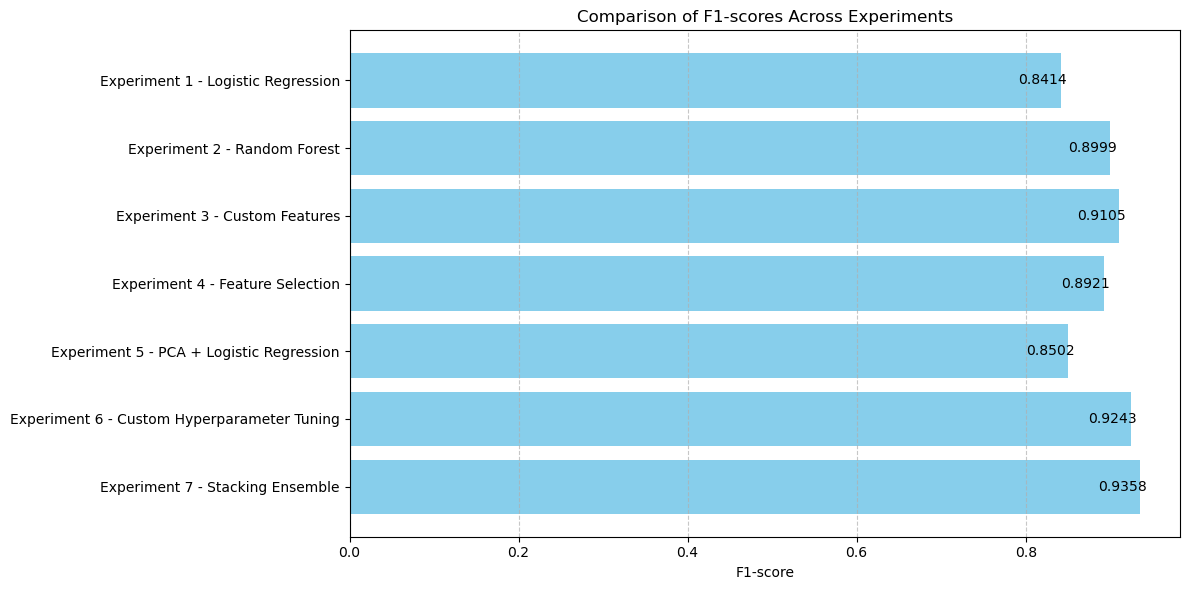

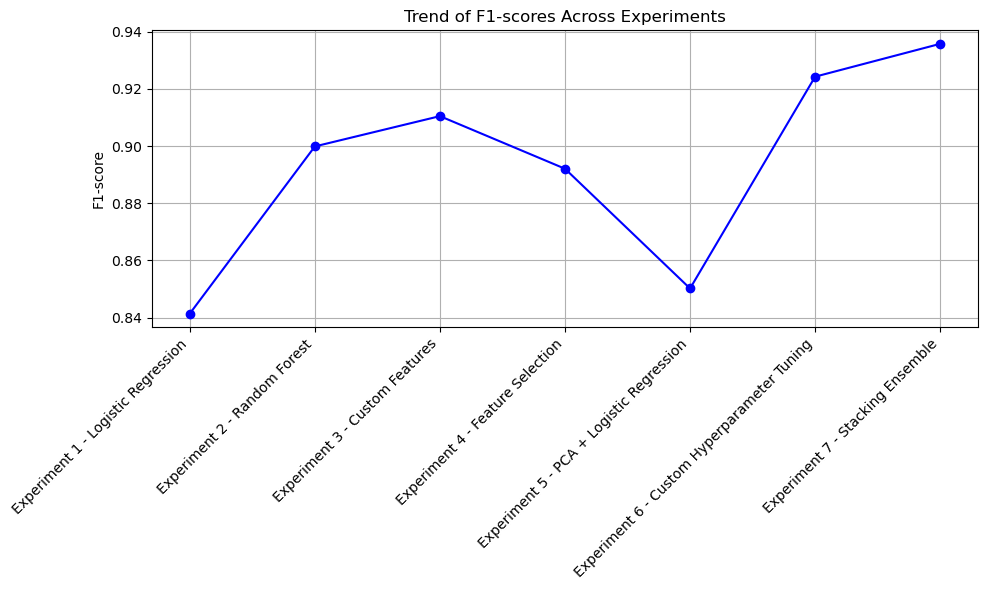

Best Experiment: Experiment 7 - Stacking Ensemble
Best F1-Score: 0.9358


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Experiment Results - Replace these F1-scores with actual values from your MLFlow logs
experiment_results = {
    'Experiment 1 - Logistic Regression': 0.8414,
    'Experiment 2 - Random Forest': 0.8999,
    'Experiment 3 - Custom Features': 0.9105,
    'Experiment 4 - Feature Selection': 0.8921,
    'Experiment 5 - PCA + Logistic Regression': 0.8502,
    'Experiment 6 - Custom Hyperparameter Tuning': 0.9243,
    'Experiment 7 - Stacking Ensemble': 0.9358
}

# Prepare Data
experiments = list(experiment_results.keys())
f1_scores = list(experiment_results.values())

# Bar Plot: F1-score comparison
plt.figure(figsize=(12, 6))
plt.barh(experiments, f1_scores, color='skyblue')
plt.xlabel('F1-score')
plt.title('Comparison of F1-scores Across Experiments')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with F1-scores
for index, value in enumerate(f1_scores):
    plt.text(value - 0.05, index, f"{value:.4f}", color='black', fontsize=10, va='center')

plt.gca().invert_yaxis()  # Flip y-axis for better readability
plt.tight_layout()
plt.show()

# Line Plot: F1-score trend
plt.figure(figsize=(10, 6))
plt.plot(experiments, f1_scores, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1-score')
plt.title('Trend of F1-scores Across Experiments')
plt.grid(True)
plt.tight_layout()
plt.show()

# Highlight the Best Model
best_experiment = max(experiment_results, key=experiment_results.get)
best_f1_score = experiment_results[best_experiment]
print(f"Best Experiment: {best_experiment}")
print(f"Best F1-Score: {best_f1_score:.4f}")


In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [2]:
import joblib

# Save the trained model to a file
model_filename = "final_model.pkl"
joblib.dump(pipeline, model_filename)

print(f"Model saved successfully to {model_filename}")


Model saved successfully to final_model.pkl


In [3]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Load the saved model
model = joblib.load("final_model.pkl")

# Initialize FastAPI app
app = FastAPI()

# Define request body structure
class PredictionRequest(BaseModel):
    features: list

# Define prediction endpoint
@app.post("/predict")
async def predict(data: PredictionRequest):
    # Convert features to numpy array
    features = np.array(data.features).reshape(1, -1)
    # Make prediction
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features).max()
    return {"prediction": int(prediction), "probability": float(probability)}

# Root endpoint
@app.get("/")
async def root():
    return {"message": "Model API is up and running!"}
